<a href="https://colab.research.google.com/github/Elmauro117/Riesgo_crediticio/blob/main/Papas_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia_smi

In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-08-20 21:03:50--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 108.177.12.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   200MB/s    in 0.4s    

2022-08-20 21:03:50 (200 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(IMAGE_SIZE,IMAGE_SIZE, CHANNELS), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [9]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [10]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 14, 14, 768)


In [11]:
## Nuevo modelo para el inceptionV3

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

input_shape = (32, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

x = layers.Flatten()(last_output)

x = layers.Dense(64, activation='relu',input_shape=input_shape)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(12, activation='relu')(x)
x = layers.Dropout(0.05)(x)

x = layers.Dense(3, activation="softmax")(x)

model3v = Model(pre_trained_model.input, x)
model3v.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer="adam",
              metrics=['acc'])

In [12]:
train_dsv3, val_dsv3, test_dsv3  = get_dataset_partitions_tf(ds)

In [13]:
resize_and_rescalev3=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentationv3 =  tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# se aplica el data augmentation
train_dsv3 = train_dsv3.map(
    lambda x, y: (data_augmentationv3(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


# se aplica rescala y tamaño a ambos train y  val
val_dsv3 = val_dsv3.map(
    lambda x, y: (resize_and_rescalev3(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

train_dsv3 = train_dsv3.map(
    lambda x, y: (resize_and_rescalev3(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dsv3 = test_dsv3.map(
    lambda x, y: (resize_and_rescalev3(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
history = model3v.fit(
      train_dsv3,
      steps_per_epoch=3,
      epochs=20,
      validation_data=val_dsv3,
      validation_steps=3,
      verbose=2)

Epoch 1/20
3/3 - 35s - loss: 0.2013 - acc: 0.9062 - val_loss: 0.0961 - val_acc: 0.9583 - 35s/epoch - 12s/step
Epoch 2/20
3/3 - 28s - loss: 0.2024 - acc: 0.8854 - val_loss: 0.2667 - val_acc: 0.9062 - 28s/epoch - 9s/step
Epoch 3/20
3/3 - 28s - loss: 0.1802 - acc: 0.9583 - val_loss: 0.1851 - val_acc: 0.9167 - 28s/epoch - 9s/step
Epoch 4/20
3/3 - 25s - loss: 0.2151 - acc: 0.9062 - val_loss: 0.1872 - val_acc: 0.9167 - 25s/epoch - 8s/step
Epoch 5/20
3/3 - 29s - loss: 0.1492 - acc: 0.9167 - val_loss: 0.0629 - val_acc: 0.9792 - 29s/epoch - 10s/step
Epoch 6/20
3/3 - 28s - loss: 0.1833 - acc: 0.9167 - val_loss: 0.1312 - val_acc: 0.9792 - 28s/epoch - 9s/step
Epoch 7/20
3/3 - 28s - loss: 0.1756 - acc: 0.9479 - val_loss: 0.0702 - val_acc: 0.9688 - 28s/epoch - 9s/step
Epoch 8/20
3/3 - 28s - loss: 0.1033 - acc: 0.9688 - val_loss: 0.1489 - val_acc: 0.9688 - 28s/epoch - 9s/step
Epoch 9/20
3/3 - 30s - loss: 0.1581 - acc: 0.9271 - val_loss: 0.1924 - val_acc: 0.9271 - 30s/epoch - 10s/step
Epoch 10/20
3/3 

3/3 - 16s - loss: 0.1872 - acc: 0.9167 - val_loss: 0.0849 - val_acc: 0.9896 - 16s/epoch - 5s/step


In [20]:
scores = model3v.evaluate(test_dsv3)
scores

8/8 [==============================] - 34s 4s/step - loss: 0.1201 - acc: 0.9570


[0.1201074868440628, 0.95703125]

In [ ]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
# Configure and compile the model


model3v.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer="adam",
              metrics=['acc'])

In [ ]:
history = model3v.fit(
      train_ds,
      steps_per_epoch=3,
      epochs=12,
      validation_data=val_ds,
      validation_steps=2,
      verbose=2
)

Epoch 1/12
3/3 - 31s - loss: 0.4136 - acc: 0.8646 - val_loss: 523.5084 - val_acc: 0.4688 - 31s/epoch - 10s/step
Epoch 2/12
3/3 - 23s - loss: 1.2321 - acc: 0.8021 - val_loss: 445.8561 - val_acc: 0.4688 - 23s/epoch - 8s/step
Epoch 3/12
3/3 - 23s - loss: 0.2628 - acc: 0.9271 - val_loss: 543.5377 - val_acc: 0.5625 - 23s/epoch - 8s/step
Epoch 4/12
3/3 - 23s - loss: 0.6814 - acc: 0.8542 - val_loss: 644.7765 - val_acc: 0.4219 - 23s/epoch - 8s/step
Epoch 5/12
3/3 - 25s - loss: 0.2905 - acc: 0.9062 - val_loss: 675.2307 - val_acc: 0.4062 - 25s/epoch - 8s/step
Epoch 6/12
3/3 - 23s - loss: 0.1827 - acc: 0.9271 - val_loss: 647.1681 - val_acc: 0.4375 - 23s/epoch - 8s/step
Epoch 7/12
3/3 - 23s - loss: 0.0966 - acc: 0.9688 - val_loss: 555.1740 - val_acc: 0.5625 - 23s/epoch - 8s/step
Epoch 8/12
3/3 - 23s - loss: 0.1697 - acc: 0.9271 - val_loss: 626.5256 - val_acc: 0.4844 - 23s/epoch - 8s/step
Epoch 9/12
3/3 - 23s - loss: 0.1958 - acc: 0.9583 - val_loss: 677.4678 - val_acc: 0.4531 - 23s/epoch - 8s/step


Text(0.5, 1.0, 'Training and validation loss')

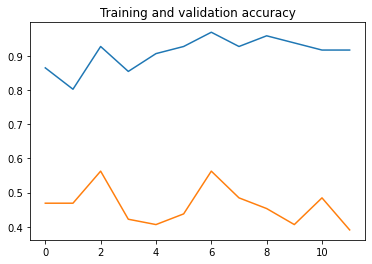

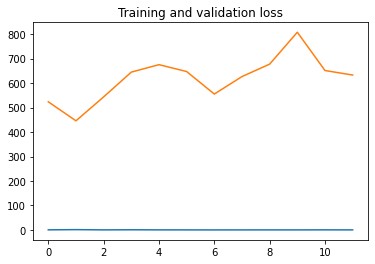

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
import numpy as np
for x, y in test_ds.take(1):
    
    first_image = x[0].numpy().astype('uint8')
    first_label = y[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",clases[first_label])
    
    batch_prediction = model3v.predict(x)
    print("predicted label:",clases[np.argmax(batch_prediction[0])])

Primeros pasos

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Papas",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32
    )

Found 2152 files belonging to 3 classes.


In [4]:
clases = ds.class_names
clases

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(ds)

68

In [ ]:
for imagen, labeldeimagen in ds.take(1):
  print(imagen.shape)
  print(labeldeimagen.numpy())

(32, 256, 256, 3)
[0 1 1 0 1 2 1 1 1 0 1 0 0 2 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0]


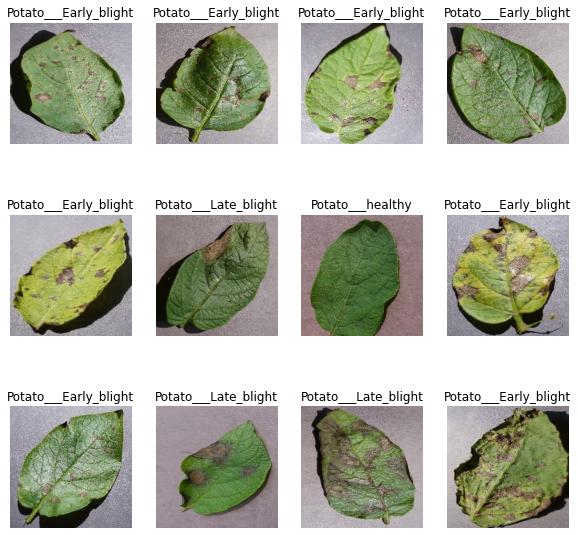

In [ ]:
plt.figure(figsize=(10, 10))
for iamgen, label in ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(iamgen[i].numpy().astype("uint8"))
        plt.title(clases[label[i]])
        plt.axis("off")

In [6]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1,test_split=0.1,
                              shuffle = True, shuffle_size=10000):
    assert (train_split+test_split+val_split) == 1
    ds_size = len(ds)

    if shuffle:
      ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds  = get_dataset_partitions_tf(ds)

In [ ]:
len(val_ds)

6

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation =  tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
# se aplica el data augmentation
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# se aplica rescala y tamaño
#train_ds = train_ds.map(
   # lambda x, y: (resize_and_rescale(x, training=True), y)
#).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (32, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3), activation ="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    #layers.Conv2D(32,(3,3), activation ="relu", input_shape=input_shape),
    #layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dropout(0.15),
    layers.Dense(n_classes, activation="softmax")
])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 sequential_15 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [ ]:
from tensorflow.keras.optimizers import RMSprop


#model.compile(
   #optimizer=RMSprop(learning_rate=0.05),
  # loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 #  metrics=["accuracy"]
#)

#Con Adam

model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
    )

In [ ]:
history = model.fit(
    train_ds,
    epochs = 17,
    batch_size=32,
    verbose=1,
    validation_data = val_ds,
)

Epoch 1/17
54/54 [==============================] - 330s 4s/step - loss: 0.7676 - accuracy: 0.6366 - val_loss: 0.5091 - val_accuracy: 0.7917
Epoch 2/17
54/54 [==============================] - 203s 4s/step - loss: 0.4845 - accuracy: 0.8310 - val_loss: 0.5061 - val_accuracy: 0.7812
Epoch 3/17
54/54 [==============================] - 203s 4s/step - loss: 0.4492 - accuracy: 0.8403 - val_loss: 0.3909 - val_accuracy: 0.8438
Epoch 4/17
54/54 [==============================] - 205s 4s/step - loss: 0.3134 - accuracy: 0.8698 - val_loss: 0.5489 - val_accuracy: 0.7656
Epoch 5/17
54/54 [==============================] - 203s 4s/step - loss: 0.2762 - accuracy: 0.8918 - val_loss: 0.2917 - val_accuracy: 0.8802
Epoch 6/17
54/54 [==============================] - 201s 4s/step - loss: 0.2470 - accuracy: 0.9022 - val_loss: 0.1740 - val_accuracy: 0.9167
Epoch 7/17
54/54 [==============================] - 204s 4s/step - loss: 0.2319 - accuracy: 0.9126 - val_loss: 0.2015 - val_accuracy: 0.9115
Epoch 8/17
54

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 872ms/step - loss: 0.1658 - accuracy: 0.9258


Modelo 2 con RMSprop

In [ ]:
input_shape = (32, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model2 = models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32,(3,3), activation ="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation ="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation="softmax")
])
model2.build(input_shape=input_shape)

In [ ]:
from tensorflow.keras.optimizers import RMSprop


model2.compile(
   optimizer=RMSprop(learning_rate=0.05),
   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
   metrics=["accuracy"]
)


In [ ]:
history2 = model2.fit(
    train_ds,
    epochs = 15,
    batch_size=32,
    verbose=1,
    validation_data = val_ds,
)

Epoch 1/15
54/54 [==============================] - 207s 4s/step - loss: 0.9100 - accuracy: 0.4659 - val_loss: 0.9490 - val_accuracy: 0.4427
Epoch 2/15
54/54 [==============================] - 200s 4s/step - loss: 0.9079 - accuracy: 0.4520 - val_loss: 0.9390 - val_accuracy: 0.4740
Epoch 3/15
54/54 [==============================] - 199s 4s/step - loss: 0.9095 - accuracy: 0.4693 - val_loss: 0.9224 - val_accuracy: 0.4740
Epoch 4/15
54/54 [==============================] - 204s 4s/step - loss: 0.9085 - accuracy: 0.4525 - val_loss: 0.9231 - val_accuracy: 0.4740
Epoch 5/15
54/54 [==============================] - 201s 4s/step - loss: 0.9044 - accuracy: 0.4711 - val_loss: 0.9229 - val_accuracy: 0.4740
Epoch 6/15
54/54 [==============================] - 199s 4s/step - loss: 0.9042 - accuracy: 0.4554 - val_loss: 0.9221 - val_accuracy: 0.4740
Epoch 7/15
54/54 [==============================] - 201s 4s/step - loss: 0.9025 - accuracy: 0.4716 - val_loss: 0.9254 - val_accuracy: 0.4740
Epoch 8/15
54

In [ ]:
scores2 = model2.evaluate(test_ds)

8/8 [==============================] - 7s 900ms/step - loss: 0.9169 - accuracy: 0.4727


Se crea plots de convergencia del modelo: model.
  El modelo 2: model2 que usa rmsprop obtiene un mal resultado, está de más usarlo

In [ ]:
history.history['accuracy']

[0.6365740895271301,
 0.8310185074806213,
 0.8402777910232544,
 0.8697916865348816,
 0.8917824029922485,
 0.9021990895271301,
 0.9126157164573669,
 0.9224537014961243,
 0.9230324029922485,
 0.9438657164573669,
 0.9560185074806213,
 0.9427083134651184,
 0.9461805820465088,
 0.9484953880310059,
 0.9450231194496155,
 0.9467592835426331,
 0.9375]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

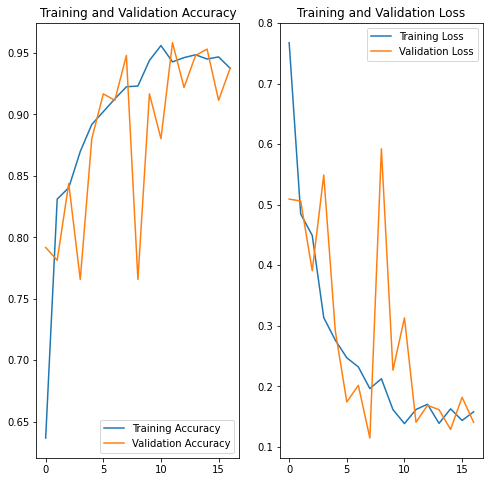

In [ ]:
EPOCHS =17
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

actual label: Potato___Early_blight
predicted label: Potato___Early_blight
actual label: Potato___Early_blight
predicted label: Potato___Early_blight
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


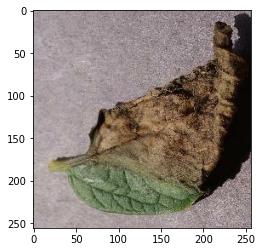

In [ ]:
import numpy as np
for x, y in test_ds.take(3):
    
    first_image = x[0].numpy().astype('uint8')
    first_label = y[0].numpy()
    
    plt.imshow(first_image)
    print("actual label:",clases[first_label])
    
    batch_prediction = model.predict(x)
    print("predicted label:",clases[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = clases[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

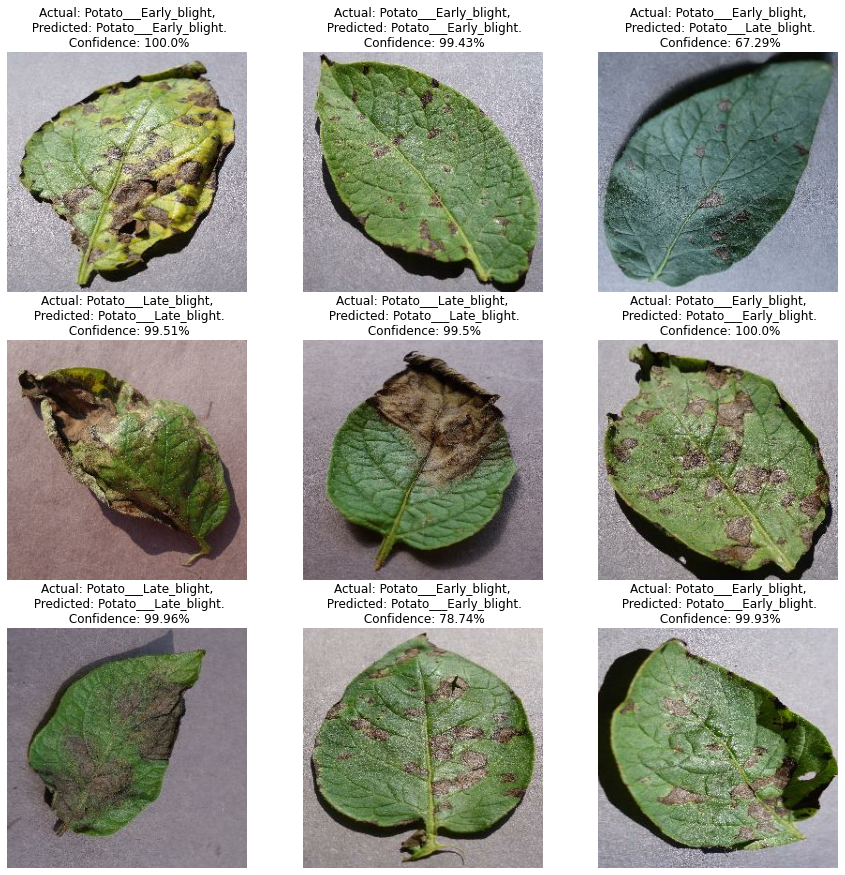

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = clases[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
### Guardar el modelo

In [ ]:
!pip install h5py pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model.save("Papasmodelo1.h5")

In [ ]:
new_model = tf.keras.models.load_model("Papasmodelo1_2.h5")
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [ ]:
loss, acc = new_model.evaluate(test_ds)
print(100*acc)

8/8 [==============================] - 10s 1s/step - loss: 0.1658 - accuracy: 0.9258
92.578125


In [22]:
model3v.save("PapasModelv3.h5")